In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-33.926942321501386 -130.29202363585767
31.96821920975819 110.9836276494583
-43.97496530912105 -8.26724903647829
76.73197047582158 -23.260055600281362
69.26370936040345 117.27595811260346
-88.95235711652226 72.43851379361914
44.149686982587355 94.5776917034483
61.48979215855533 -154.84469742161605
30.771355436119407 -39.245571820571115
47.21192489791076 6.7321745990840896
0.7678968257226586 -73.33457116637501
-83.4179457744089 -116.71564749281137
22.789651917099633 162.5861138116815
-60.74521111858658 31.141708052439583
-45.19541190052223 -80.50639093968321
-39.61491677108903 76.0198574126224
-80.36881579394506 -158.0402079517512
-60.57537960778582 167.28224016870115
-27.977465034324155 7.042344514549171
-26.705749792250174 30.49392650061378
64.5525515565742 36.15329785923518
15.182219119171393 92.41785523110093
-12.283486501922184 176.84154723047465
42.53952969204656 -92.77955610230079
-52.214939015265784 -116.38211310276705
31.801843555710292 -99.9806941077844
-5.564482232137806 -46.

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?id=524901&appid=" + weather_api_key

In [14]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | shiyan
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | saskylakh
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | hami
Processing Record 8 of Set 1 | kenai
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | la chaux-de-fonds
Processing Record 11 of Set 1 | calamar
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | castro
Processing Record 16 of Set 1 | mahebourg
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | luderitz
Processing Record 20 of Set 1 | piet retief
Processing Record 21 of Set 1 | solovetskiy
City

Processing Record 38 of Set 4 | kemijarvi
Processing Record 39 of Set 4 | bethel
Processing Record 40 of Set 4 | bara
Processing Record 41 of Set 4 | dikson
Processing Record 42 of Set 4 | kruisfontein
Processing Record 43 of Set 4 | soyo
Processing Record 44 of Set 4 | olds
Processing Record 45 of Set 4 | el fuerte
Processing Record 46 of Set 4 | santo tomas
Processing Record 47 of Set 4 | sakakah
Processing Record 48 of Set 4 | saint-pierre
Processing Record 49 of Set 4 | puerto carreno
Processing Record 50 of Set 4 | santa rosa
Processing Record 1 of Set 5 | barrow
Processing Record 2 of Set 5 | lovington
Processing Record 3 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 4 of Set 5 | conceicao das alagoas
Processing Record 5 of Set 5 | tabat
Processing Record 6 of Set 5 | namibe
Processing Record 7 of Set 5 | carnarvon
Processing Record 8 of Set 5 | kon tum
Processing Record 9 of Set 5 | saint-augustin
Processing Record 10 of Set 5 | shakiso
Processing Record 11 o

Processing Record 31 of Set 8 | sur
Processing Record 32 of Set 8 | maragogi
Processing Record 33 of Set 8 | salamiyah
Processing Record 34 of Set 8 | novopavlovka
Processing Record 35 of Set 8 | emerald
Processing Record 36 of Set 8 | faya
Processing Record 37 of Set 8 | vardo
Processing Record 38 of Set 8 | taoudenni
Processing Record 39 of Set 8 | pingliang
Processing Record 40 of Set 8 | bam
Processing Record 41 of Set 8 | mairana
Processing Record 42 of Set 8 | sapa
Processing Record 43 of Set 8 | mount isa
Processing Record 44 of Set 8 | union
Processing Record 45 of Set 8 | oussouye
Processing Record 46 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 47 of Set 8 | price
Processing Record 48 of Set 8 | toliary
City not found. Skipping...
Processing Record 49 of Set 8 | pangnirtung
Processing Record 50 of Set 8 | kerema
Processing Record 1 of Set 9 | placido de castro
Processing Record 2 of Set 9 | arai
Processing Record 3 of Set 9 | ouargaye
Processing Record 4 

Processing Record 17 of Set 12 | roebourne
Processing Record 18 of Set 12 | dawson creek
Processing Record 19 of Set 12 | newport beach
Processing Record 20 of Set 12 | naze
Processing Record 21 of Set 12 | vila
Processing Record 22 of Set 12 | whitchurch-stouffville
City not found. Skipping...
Processing Record 23 of Set 12 | amecameca
Processing Record 24 of Set 12 | kwinana
Processing Record 25 of Set 12 | frederico westphalen
Processing Record 26 of Set 12 | puerto maldonado
Processing Record 27 of Set 12 | tayu
Processing Record 28 of Set 12 | vestmanna
Processing Record 29 of Set 12 | batken
Processing Record 30 of Set 12 | arkhangelskaya
Processing Record 31 of Set 12 | haimen
Processing Record 32 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 33 of Set 12 | ritchie
Processing Record 34 of Set 12 | ambilobe
Processing Record 35 of Set 12 | yuncheng
Processing Record 36 of Set 12 | kaluga
Processing Record 37 of Set 12 | vila do maio
Processing Record 38 of Se

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,299.41,77,7,8.63,PF,2023-02-10 20:59:37
1,Shiyan,32.6475,110.7781,277.51,91,100,1.08,CN,2023-02-10 20:59:38
2,Jamestown,42.0970,-79.2353,275.38,93,100,7.20,US,2023-02-10 20:59:38
3,Saskylakh,71.9167,114.0833,230.24,98,54,3.27,RU,2023-02-10 20:59:39
4,Hami,42.8000,93.4500,272.27,50,99,3.65,CN,2023-02-10 20:59:39
5,Kenai,60.5544,-151.2583,264.34,85,100,13.38,US,2023-02-10 20:59:40
6,Ribeira Grande,38.5167,-28.7000,288.58,82,20,3.60,PT,2023-02-10 20:59:40
7,La Chaux-De-Fonds,47.0999,6.8259,271.29,86,99,0.00,CH,2023-02-10 20:59:40
8,Calamar,10.2511,-74.9146,310.33,30,20,4.06,CO,2023-02-10 20:59:41
9,Punta Arenas,-53.1500,-70.9167,290.16,41,40,12.35,CL,2023-02-10 20:59:41


In [18]:
#Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
city_data_df = pd.DataFrame(city_data)
city_data_new_column_order_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_new_column_order_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2023-02-10 20:59:37,-23.1203,-134.9692,299.41,77,7,8.63
1,Shiyan,CN,2023-02-10 20:59:38,32.6475,110.7781,277.51,91,100,1.08
2,Jamestown,US,2023-02-10 20:59:38,42.0970,-79.2353,275.38,93,100,7.20
3,Saskylakh,RU,2023-02-10 20:59:39,71.9167,114.0833,230.24,98,54,3.27
4,Hami,CN,2023-02-10 20:59:39,42.8000,93.4500,272.27,50,99,3.65
5,Kenai,US,2023-02-10 20:59:40,60.5544,-151.2583,264.34,85,100,13.38
6,Ribeira Grande,PT,2023-02-10 20:59:40,38.5167,-28.7000,288.58,82,20,3.60
7,La Chaux-De-Fonds,CH,2023-02-10 20:59:40,47.0999,6.8259,271.29,86,99,0.00
8,Calamar,CO,2023-02-10 20:59:41,10.2511,-74.9146,310.33,30,20,4.06
9,Punta Arenas,CL,2023-02-10 20:59:41,-53.1500,-70.9167,290.16,41,40,12.35


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

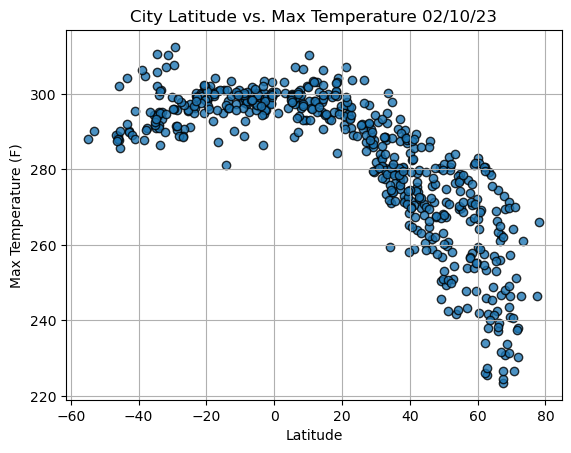

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

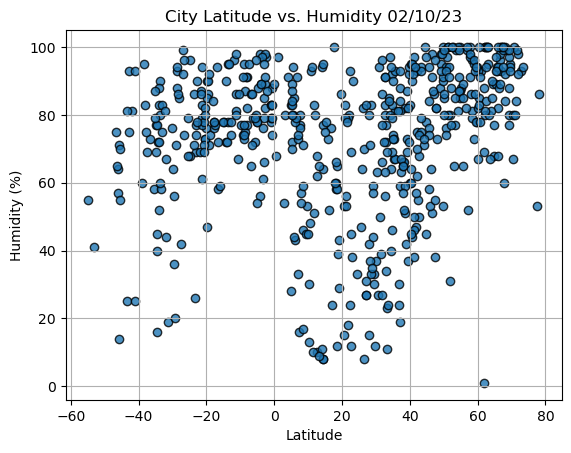

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

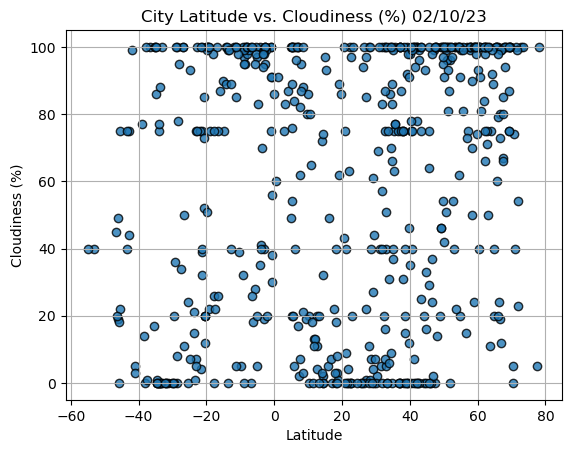

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

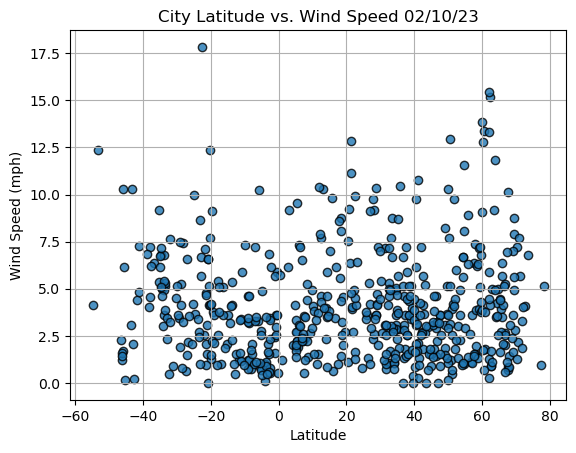

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
index13 = city_data_df.loc[13]
index13

City                    Mahebourg
Lat                      -20.4081
Lng                          57.7
Max Temp                   299.96
Humidity                       73
Cloudiness                     20
Wind Speed                   4.12
Country                        MU
Date          2023-02-10 20:59:42
Name: 13, dtype: object

In [27]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4       True
       ...  
559    False
560     True
561    False
562     True
563    False
Name: Lat, Length: 564, dtype: bool

In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Shiyan,32.6475,110.7781,277.51,91,100,1.08,CN,2023-02-10 20:59:38
2,Jamestown,42.0970,-79.2353,275.38,93,100,7.20,US,2023-02-10 20:59:38
3,Saskylakh,71.9167,114.0833,230.24,98,54,3.27,RU,2023-02-10 20:59:39
4,Hami,42.8000,93.4500,272.27,50,99,3.65,CN,2023-02-10 20:59:39
5,Kenai,60.5544,-151.2583,264.34,85,100,13.38,US,2023-02-10 20:59:40


In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

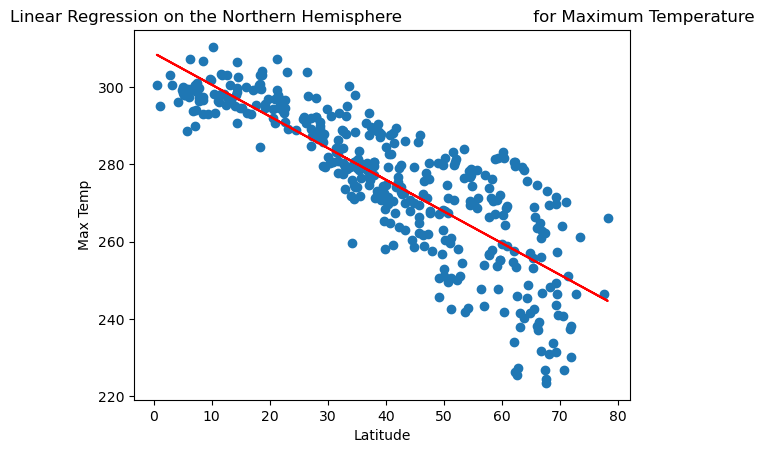

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

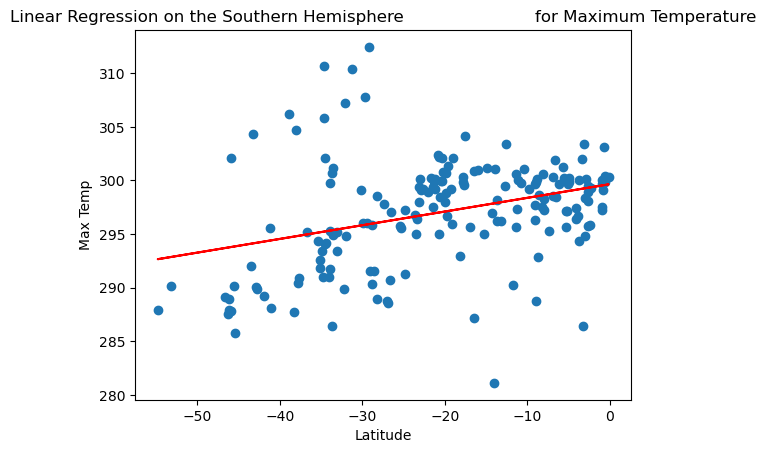

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

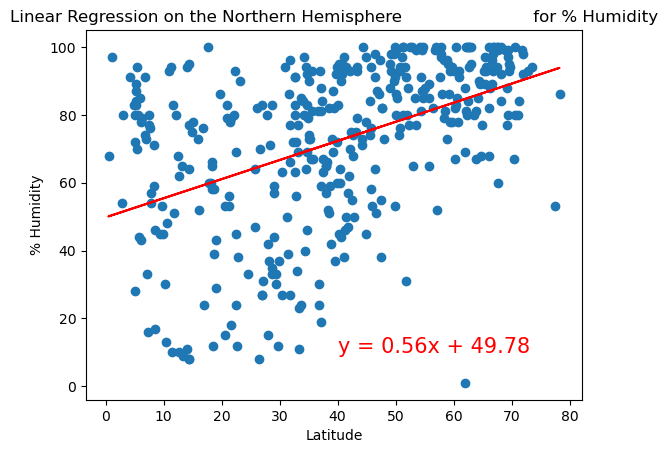

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

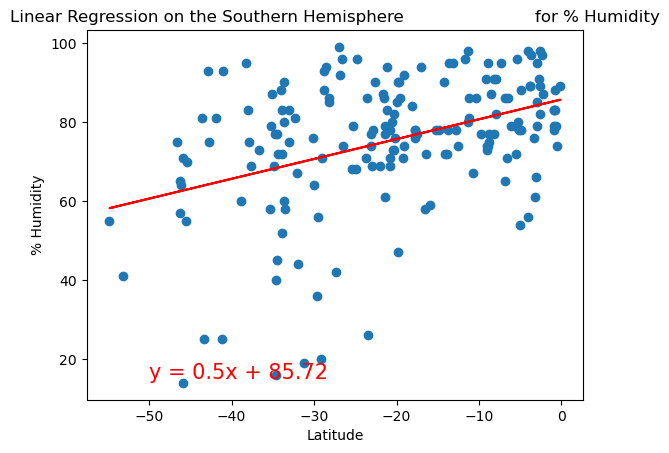

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

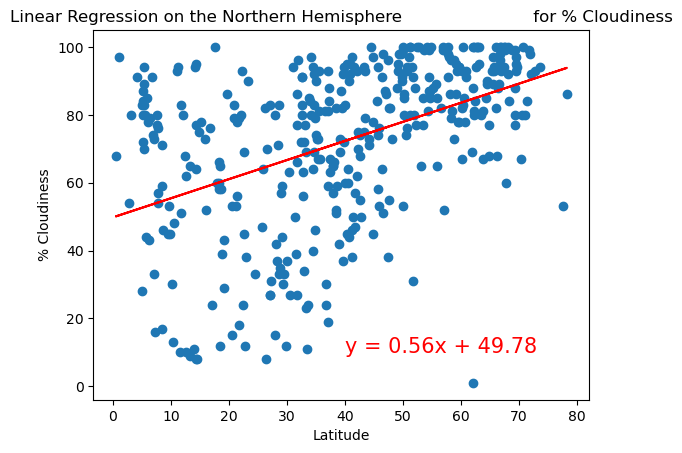

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

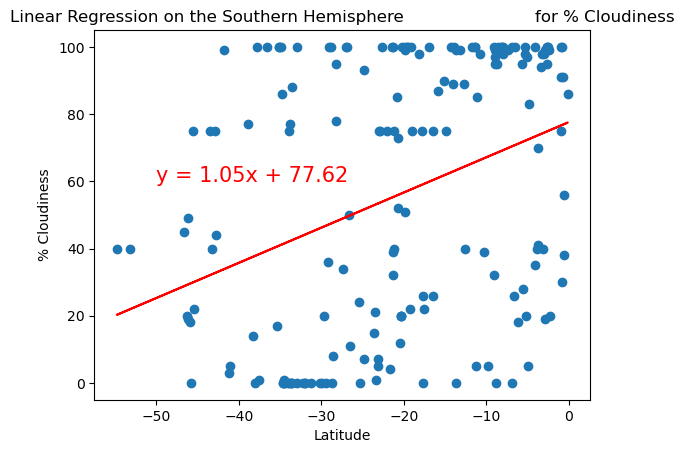

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

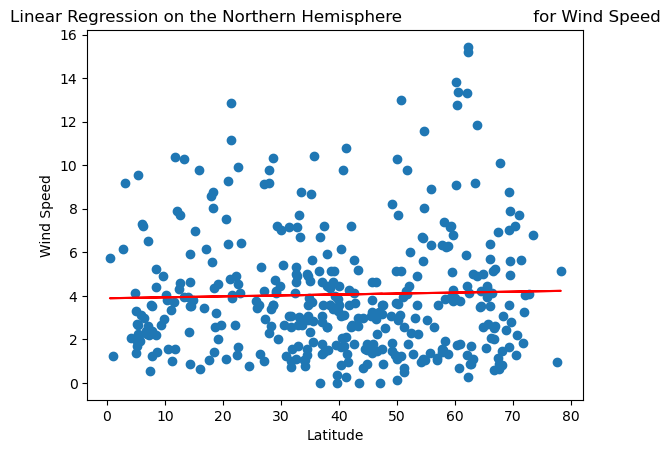

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

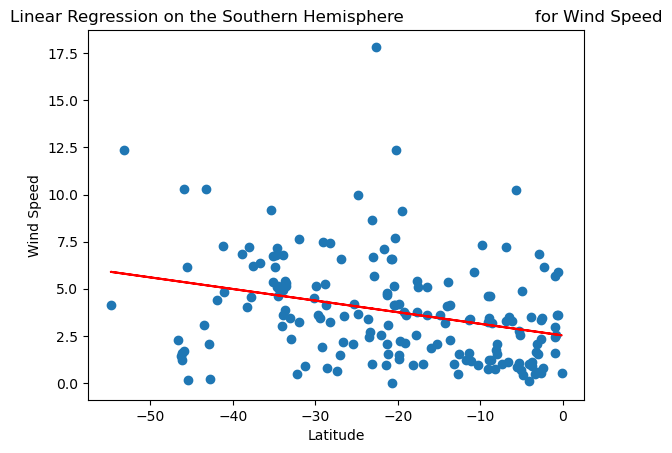

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))